# Figure 3 #

In this notebook we show how to calculate torsion angles and plot their distribution. 
In the last part, we calculate $^3$J scalar couplings and compare with experimental data. 



In [2]:
import numpy as np
import pickle


# read eRMSD from pickle
fname = "ermsd.p"
print "# reading pickle %s" % fname,
ermsd = pickle.load(open(fname, "r"))
print " shape ", ermsd.shape

# consider structures where ermsd is smaller than 1.5
qq = np.where(ermsd<1.5)[0]

# read torsion angles from pickle
fname = "angles.p"
print "# reading pickle %s" % fname,
angles, res = pickle.load(open(fname, "r"))
print " shape ", angles.shape

# calculate couplings and save to pickle
fname = "couplings.p"
print "# reading pickle %s" % fname,
couplings, res = pickle.load(open(fname, "r"))
print " - shape ", couplings.shape


# read file with experimental J-couplings
from barnaba.definitions import couplings_idx

fh = open("jcouplings.dat")
key =  couplings_idx.keys()
exp = [[] for z in range(len(res))]
for line in fh:
    if("#" in line): continue
    ii = int(line.split()[0])-1
    exp[ii].append([line.split()[1],float(line.split()[2])])
fh.close()



# reading pickle ermsd.p  shape  (20000,)
# reading pickle angles.p  shape  (20000, 14, 7)
# reading pickle couplings.p  - shape  (20000, 14, 12)


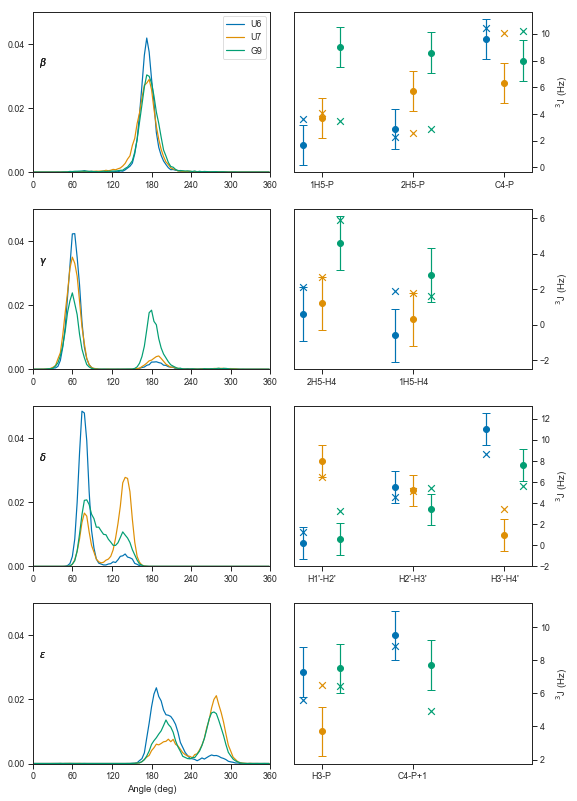

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import barnaba as bb

# now do the plot. set ticks and colors
sns.set_style("ticks")
sns.set_context("paper")
colors = [ "#FFD300","#009F6B","#000000"]
cols = sns.color_palette("colorblind", 3)

# define bins for histogram
bins = np.linspace(0,360,100)
# plot angles in nucleotides 6,7 and 9
labs = ["U6","U7","G9"]
rr = [5,6,8]

# plot beta, gamma, delta and epsilon angles
angs = [1,2,3,4]
nams = [r"$\beta$",r"$\gamma$",r"$\delta$",r"$\epsilon$"]

# these two lists are used to plot specific scalar couplings of interest
myk = [["1H5P","2H5P","C4Pb"],\
       ["2H5H4","1H5H4"],\
       ["H1H2","H2H3","H3H4"],\
       ["H3P","C4Pe"]]
mykn = [["1H5-P","2H5-P","C4-P"],\
       ["2H5-H4","1H5-H4"],\
       ["H1'-H2'","H2'-H3'","H3'-H4'"],\
       ["H3-P","C4-P+1"]]


# define figure 
plt.figure(figsize=(9,12))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.87, top=0.97,
                        wspace=0.1, hspace=0.23)

# plot
for k,a in enumerate(angs):
    ax1 = plt.subplot2grid((4, 2), (k, 0), colspan=1)
    for j,r in enumerate(rr):
        # convert to deg and move to 0:360 range
        dd = angles[qq,r,a]*(180./np.pi)
        dd[np.where(dd<0.0)] += 360
        # make histogram 
        hh1,ee1 = np.histogram(dd,bins=bins,density=True)
        xx = 0.5*(ee1[1:]+ee1[:-1])
        # set nice limits and ticks
        plt.xlim(0,360)
        plt.ylim(0,0.05)
        plt.xticks([0,60,120,180,240,300,360])
        plt.yticks([0,0.02,0.04])
        plt.text(10,0.033,nams[k])
        # plot histogram. Make labels for legend 
        if(k==0):
            plt.plot(xx,hh1,c=cols[j],label=labs[j])
        else:
            plt.plot(xx,hh1,c=cols[j])
    if(k==0):
        plt.legend()
    if(k==3):
        plt.xlabel("Angle (deg)")
    ax2 = plt.subplot2grid((4, 2), (k, 1), colspan=1)
    # now plot experimental data. This is done manually, 
    # because we hand-picked some of the couplings 
    xpos = 0
    plt.xlim(-0.5,12.5)
    xt = []
    xtl = []
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    ax2.set_ylabel("$^3$J (Hz)")
    for z,c in enumerate(myk[k]):
        xt.append(xpos+1)
        xtl.append(mykn[k][z])
        for j,r in enumerate(rr):
            for exps in exp[r]:
                if(exps[0] == c):
                    # scatter experimental data (cross)
                    (_, caps, _) = plt.errorbar(xpos,exps[1], yerr=1.5,c=cols[j],fmt='o',capsize=4,markersize=6)
                    for cap in caps:
                        cap.set_markeredgewidth(1.0)
                    # scatter average from simulation
                    yyd = couplings[qq,r,key.index(c)]
                    plt.scatter(xpos,np.average(yyd),c=cols[j],marker="x",s=45)
            xpos += 1
        xpos += 2
    plt.xticks(xt,xtl)
 
plt.show()

